# Introduction: Defining the Gradient Descent functions

In [268]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import random


# function to compute predictions created for the current dataset
# where y = w0 + w1*x1 +...+w8*x8 
def predict(X, y, theta):
  pred = np.dot(X, theta[0:8]) + theta[8] 
  return pred


# function to compute gradient of error 
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = (2/X.shape[0])*np.dot(X.transpose(), (h - y)) 
    return grad 
  
# function to compute MSE
def cost(X, y, theta): 
    h = np.dot(X, theta)
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J[0] 
  
# function to perform full-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.01, steps=1000): 
    X = np.c_[ X, np.ones(X.shape[0]) ] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 1)) #create inital weights w0, w1..wd
    error_list = []  
    for s in range(steps):
      theta = theta - learning_rate * gradient(X, y, theta) 
      error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
  
    return theta, error_list 
    
# function to perform mini-batch gradient descent (for stochastic gradient descent, 'bacthes' must have chunksize=1)
def mini_batch_gradientDescent(batches, x, y, learning_rate = 0.01, steps=3):
  chunks = list(batches) #Getting a list of the batches
  X_chunk, y_chunk = chunks[0] #Now we get the first items of the batch, so we can properly initialize theta
  X_ch = np.c_[ X_chunk, np.ones(X_chunk.shape[0]) ] #Theta has to be initialized with regard to X + plus the columns of one's 
  theta = np.zeros((X_ch.shape[1], 1)) #Initializing theta
  err_list = []
  for s in range(steps): 
    for X_chunk, y_chunk in chunks:
      X_ch = np.c_[ X_chunk, np.ones(X_chunk.shape[0]) ]  
      theta = theta - learning_rate * gradient(X_ch, y_chunk, theta) #Computing the gradient for every batch 
      err_list.append(cost(X_ch, y_chunk, theta))

  return theta, err_list 



# Mounting Content from Google Drive


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading the Housing Dataset and performing scaling

In [149]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os
import re
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

housing_path = "/content/gdrive/My Drive/HousingData.csv"

housing_df = pd.read_csv(housing_path)
y = housing_df['Median House Value']

x = housing_df.drop(columns=['Median House Value'])
x = x.drop(x.columns[[0]], axis=1) 
X = x.values
y = y.values
y = np.array(y).reshape(-1,1) #Reshaping the y array so it can be passed properly to the gradient descent functions.


scaler = MinMaxScaler()

X_n = scaler.fit_transform(x) #Performing min-max scaling on the X array and saving it to X_new

# Part 1: Gradient Descent

# Gradient Descent with 1000 steps

R2 score is:  0.5616774142770414


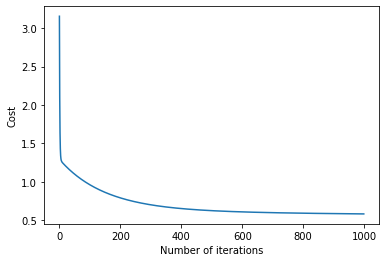

In [152]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

theta1, err_list1 = gradientDescent(X_n,y, 0.1, 1000)
ret_pred1 = predict(X_n,y,theta1)
print('R2 score is: ', r2_score(y, ret_pred1)) #R2 score is the metric used in every algorithm.

plt.plot(err_list1) #Visualizing the change in the error function.
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 


# Gradient Descent with 5000 steps

R2 score is:  0.5906530181412009


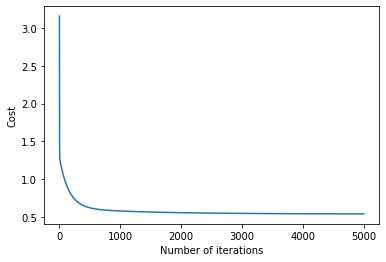

In [153]:
theta2, err_list2 = gradientDescent(X_n,y, 0.1, 5000) 
ret_pred2 = predict(X_n,y,theta2)
print('R2 score is: ',r2_score(y, ret_pred2))

plt.plot(err_list2) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Gradient Descent with 10000 steps

R2 score is:  0.5929860052531213


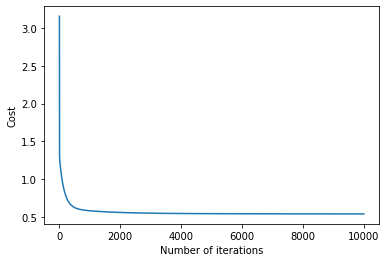

In [282]:
theta3, err_list3 = gradientDescent(X_n,y, 0.1, 10000)
ret_pred3 = predict(X_n,y,theta3)
print('R2 score is: ',r2_score(y, ret_pred3))

plt.plot(err_list3) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Defining functions needed for Mini-batch gradient descent

In [269]:
import math
 
#Here we define a function that gets every divisor of a given number. We may use it during the batch creation.
def divisorGenerator(n):
    large_divisors = []
    for i in range(1, int(math.sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor


lst = list(divisorGenerator(len(X_n))) #Getting divisors of X's length. 

#Getting the closest divisor. Will be used in case the given 'chunksize' number cannot divide the X, y arrays.
def round_down(divs,n): 
  return min(divs, key=lambda x:abs(x-n))

#Creating mini batches for the X, y arrays
def create_minibatches(chunksize):

    if (len(X_n)%chunksize != 0): #If the given number cannot divide the array we round to the closest divisor.
      chunksize = round_down(lst,chunksize)

    chunkstartmaker = 0
    while chunkstartmaker < len(X_n): 
        chunk_rows = range(chunkstartmaker, chunkstartmaker+chunksize) #Getting the rows we need.
        X_chunk = X_n[chunk_rows] #Keeping the needed rows from X and y.
        y_chunk = y[chunk_rows] 
        yield X_chunk, y_chunk #Getting the batch.
        chunkstartmaker = chunkstartmaker + chunksize #Setting the new starting position for the next batch.

# Part 2: Stochastic Gradient Descent

# Stochastic Gradient Descent with 3 steps

R2 score is:  0.5828988791845165


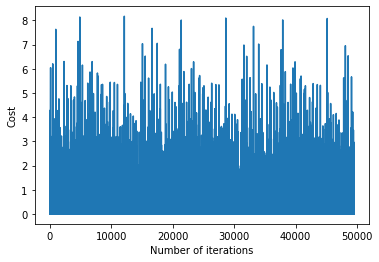

In [270]:
batches = create_minibatches(chunksize=1) #Setting chunksize = 1 for Stochastic Descent. 

#Same stuff as we did for Gradient Descent. 
stoch_thet1, err_list1 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 3)
stoch_pred = predict(X_n,y,stoch_thet1) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list1) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Stochastic Gradient Descent with 5 steps

R2 score is:  0.5835605018142351


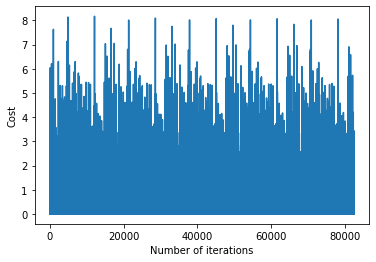

In [271]:
batches = create_minibatches(chunksize=1)

stoch_thet2, err_list2 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 5)
stoch_pred = predict(X_n,y,stoch_thet2) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list2) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Stochastic Gradient Descent with 10 steps

R2 score is:  0.5842137114815584


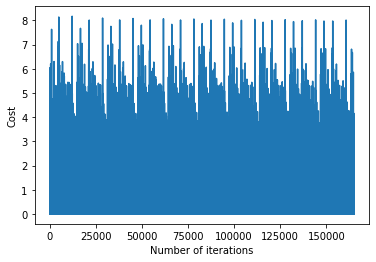

In [272]:
batches = create_minibatches(chunksize=1)

stoch_thet3, err_list3 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 10)
stoch_pred = predict(X_n,y,stoch_thet3) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list3) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Part 3: Mini-batch Gradient Descent

# Mini-batch Gradient Descent with batch size 8 and 3 steps

R2 score is:  0.5861097600753541


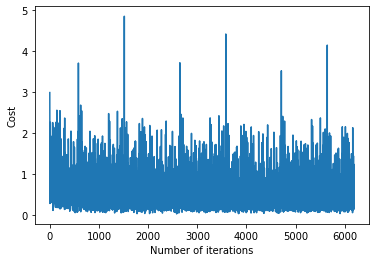

In [273]:
batches = create_minibatches(chunksize=8) #For Mini-batch examples we will try sizes of 8, 32 and 128. Starting here with 8.

stoch_thet1, err_list1 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 3)
stoch_pred = predict(X_n,y,stoch_thet1) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list1) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 8 and 5 steps

R2 score is:  0.5874373691756694


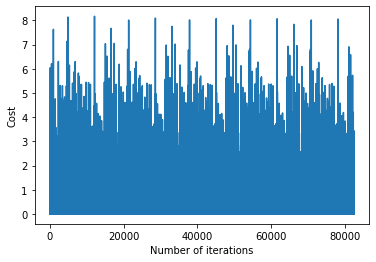

In [274]:
batches = create_minibatches(chunksize=8)

stoch_thet2, err_list1 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 5)
stoch_pred = predict(X_n,y,stoch_thet2) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list2) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 8 and 10 steps

R2 score is:  0.5885960116522905


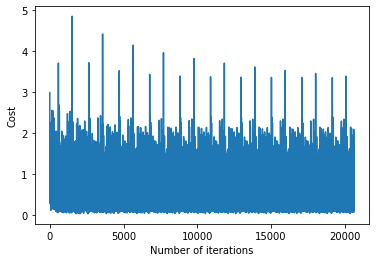

In [275]:
batches = create_minibatches(chunksize=8)

stoch_thet3, err_list3 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 10)
stoch_pred = predict(X_n,y,stoch_thet3) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list3) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 32 and 3 steps

R2 score is:  0.5855000137751118


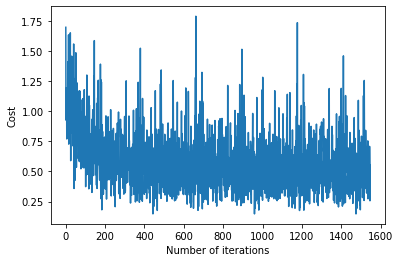

In [276]:
batches = create_minibatches(chunksize=32) #Now we get examples for batch size = 32. 

stoch_thet1, err_list1 = mini_batch_gradientDescent(batches, X_n, y, 0.2, 3)
stoch_pred = predict(X_n,y,stoch_thet1) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list1) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 32 and 5 steps

R2 score is:  0.5901889612357686


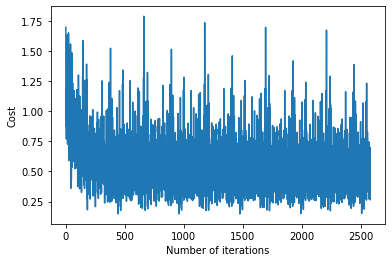

In [277]:
batches = create_minibatches(chunksize=32)

stoch_thet2, err_list2 = mini_batch_gradientDescent(batches, X_n, y, 0.2, 5)
stoch_pred = predict(X_n,y,stoch_thet2) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list2) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 32 and 10 steps

R2 score is:  0.5882255280793258


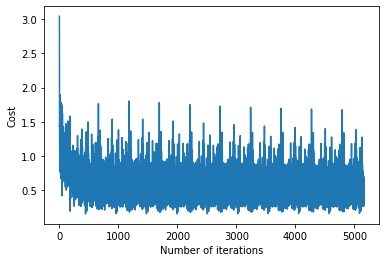

In [278]:
batches = create_minibatches(chunksize=32)

stoch_thet3, err_list3 = mini_batch_gradientDescent(batches, X_n, y, 0.1, 10)
stoch_pred = predict(X_n,y,stoch_thet3) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list3) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 128 and 3 steps

R2 score is:  0.5698378241705182


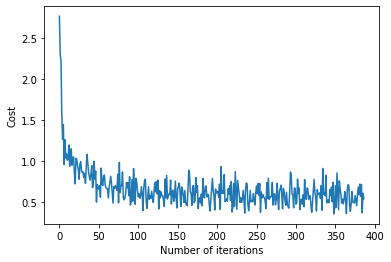

In [279]:
batches = create_minibatches(chunksize=128) #Finally, examples with batch size = 128.

stoch_thet1, err_list1 = mini_batch_gradientDescent(batches, X_n, y, 0.5, 3)
stoch_pred = predict(X_n,y,stoch_thet1) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list1) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 128 and 5 steps

R2 score is:  0.5820148838178438


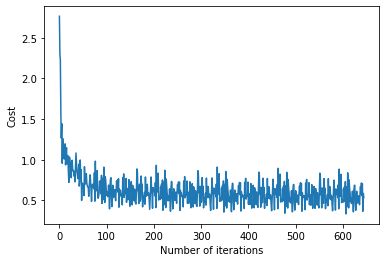

In [280]:
batches = create_minibatches(chunksize=128)

stoch_thet2, err_list2 = mini_batch_gradientDescent(batches, X_n, y, 0.5, 5)
stoch_pred = predict(X_n,y,stoch_thet2) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list2) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 

# Mini-batch Gradient Descent with batch size 128 and 10 steps

R2 score is:  0.5896656529495061


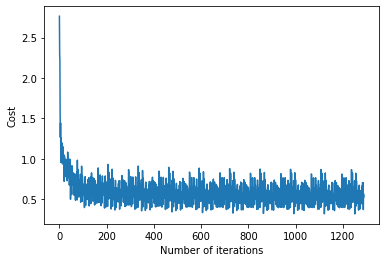

In [281]:
batches = create_minibatches(chunksize=128)

stoch_thet3, err_list3 = mini_batch_gradientDescent(batches, X_n, y, 0.5, 10)
stoch_pred = predict(X_n,y,stoch_thet3) 
print('R2 score is: ',r2_score(y, stoch_pred))

plt.plot(err_list3) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 